Data Project - Stock Market Analysis

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

Basic Analysis of Stock Information:

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Gives a white backgroud to all our libraries
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [4]:
for stock in tech_list:
    globals()[stock]= DataReader(stock,'yahoo',start,end)    

In [5]:
AAPL

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-11-02,120.800003,121.360001,119.610001,121.180000,32203300,118.643292
2015-11-03,120.790001,123.489998,120.699997,122.570000,45519000,120.004194
2015-11-04,123.129997,123.820000,121.620003,122.000000,44886100,119.446126
2015-11-05,121.849998,122.690002,120.180000,120.919998,39552700,118.895499
2015-11-06,121.110001,121.809998,120.620003,121.059998,33042300,119.033154
2015-11-09,120.959999,121.809998,120.050003,120.570000,33871400,118.551360
2015-11-10,116.900002,118.070000,116.059998,116.769997,59127900,114.814979
2015-11-11,116.370003,117.419998,115.209999,116.110001,45218000,114.166033
2015-11-12,116.260002,116.820000,115.650002,115.720001,32525600,113.782563


Let's play with the Apple stocks


In [9]:
AAPL.describe()
#Adj Close - Close price after any changes in the stock

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,105.053953,105.950040,104.145138,105.053952,3.978683e+07,104.165009
std,8.289906,8.259181,8.271694,8.255632,1.716591e+07,8.214362
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.320000,98.209999,96.580002,97.139999,2.803160e+07,96.348065
50%,105.519997,106.309998,104.879997,105.790001,3.519240e+07,104.701886
75%,112.019997,113.029999,110.800003,112.099998,4.596430e+07,110.821272
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-11-02 to 2016-11-01
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


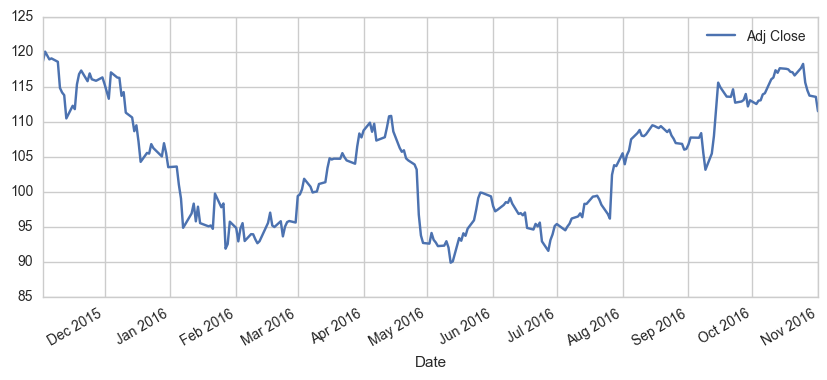

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

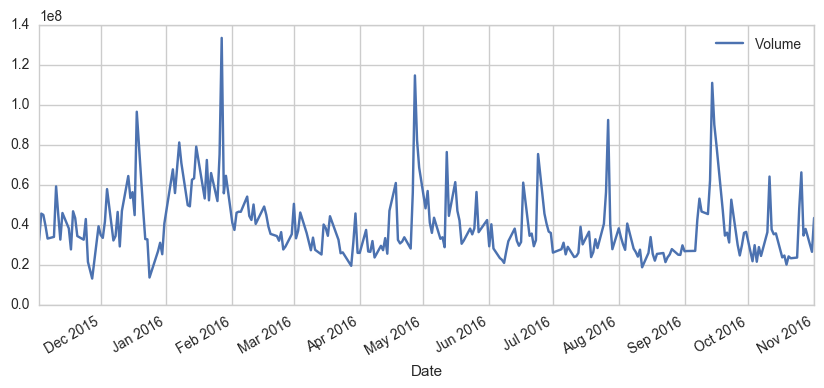

In [13]:
AAPL['Volume'].plot(legend=True, figsize=(10,4)) #Daily peaks of vloume traded

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [14]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name= "MA for %s days" %(str(ma))
    
    AAPL[column_name]= pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\PrasadPagade\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\PrasadPagade\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


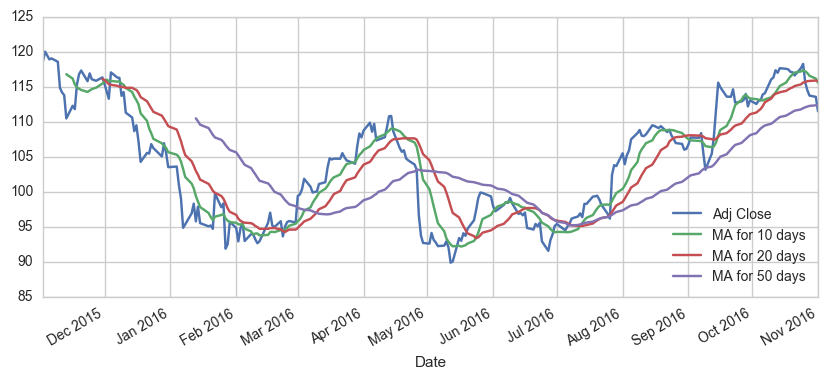

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

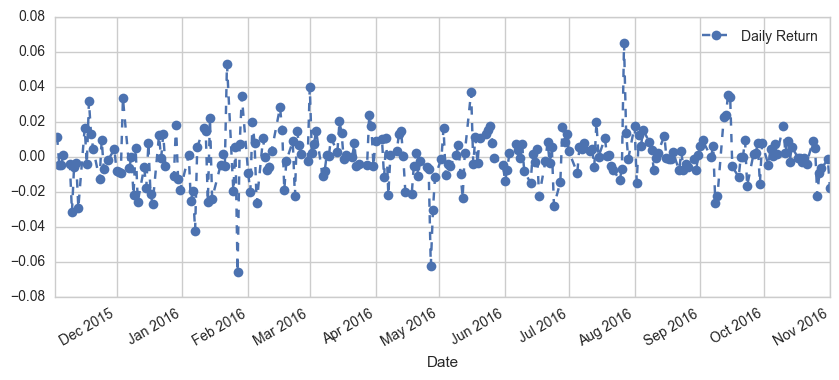

In [20]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(10,4),linestyle='--',marker='o')


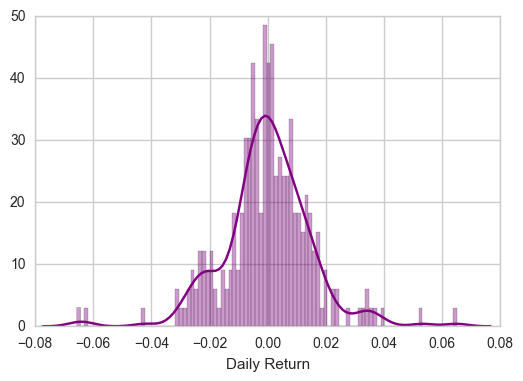

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

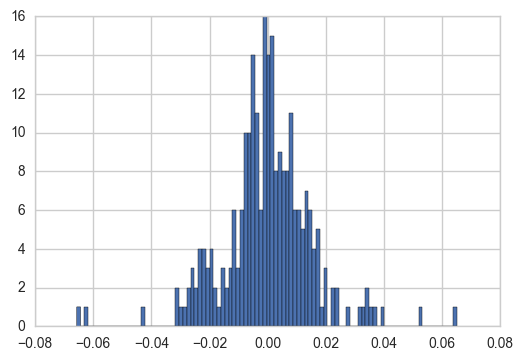

In [24]:
AAPL['Daily Return'].hist(bins=100)

Now, we will analyze how our stocks returns are ...


In [25]:
#Create a new DF for closing price
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-11-02,118.643292,628.349976,721.109985,51.818889
2015-11-03,120.004194,625.309998,722.159973,52.704599
2015-11-04,119.446126,640.950012,728.109985,52.947926
2015-11-05,118.895499,655.650024,731.250000,52.928459
2015-11-06,119.033154,659.369995,733.760010,53.454042


In [27]:
tech_rets = closing_df.pct_change()

In [28]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-11-02,NaN,NaN,NaN,NaN
2015-11-03,0.011471,-0.004838,0.001456,0.017092
2015-11-04,-0.004650,0.025012,0.008239,0.004617
2015-11-05,-0.004610,0.022935,0.004313,-0.000368
2015-11-06,0.001158,0.005674,0.003432,0.009930


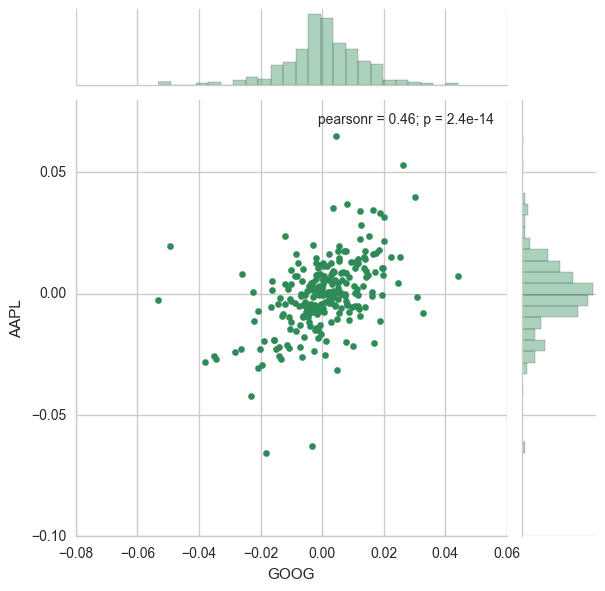

In [30]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

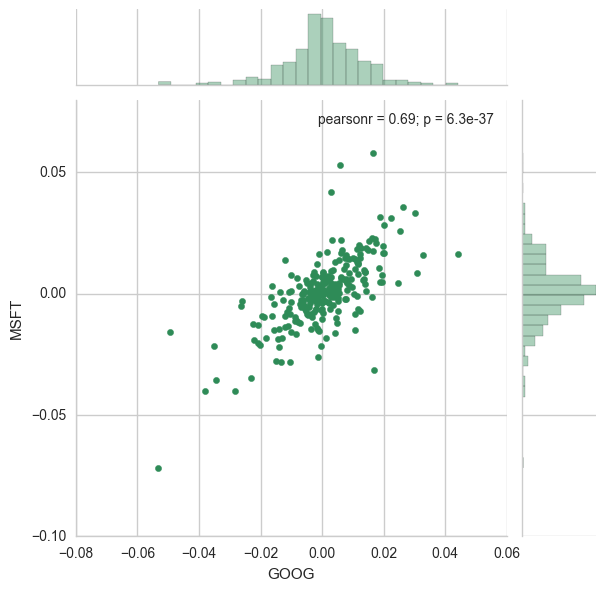

In [31]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')\
#Looks like these are correlated

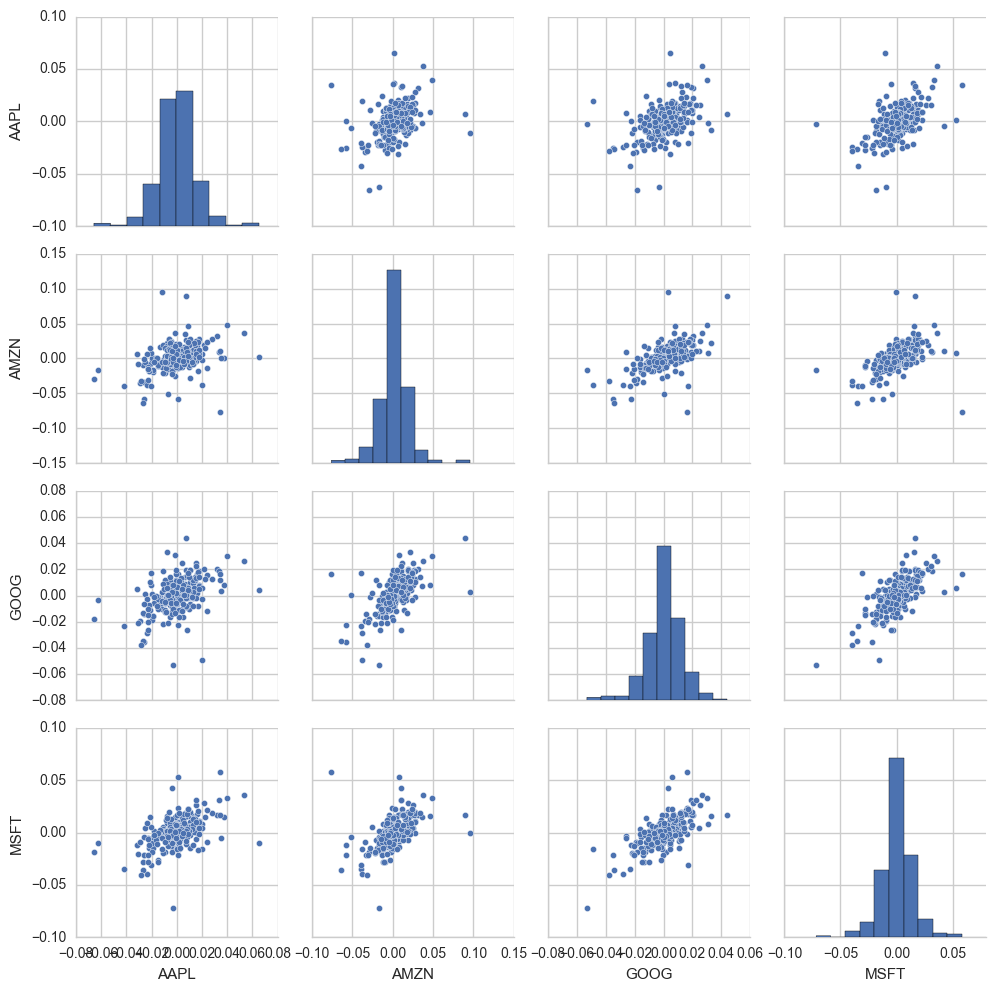

In [32]:
sns.pairplot(tech_rets.dropna())

#See that by eyeballing there is a relationship between Google and Amazon stocks

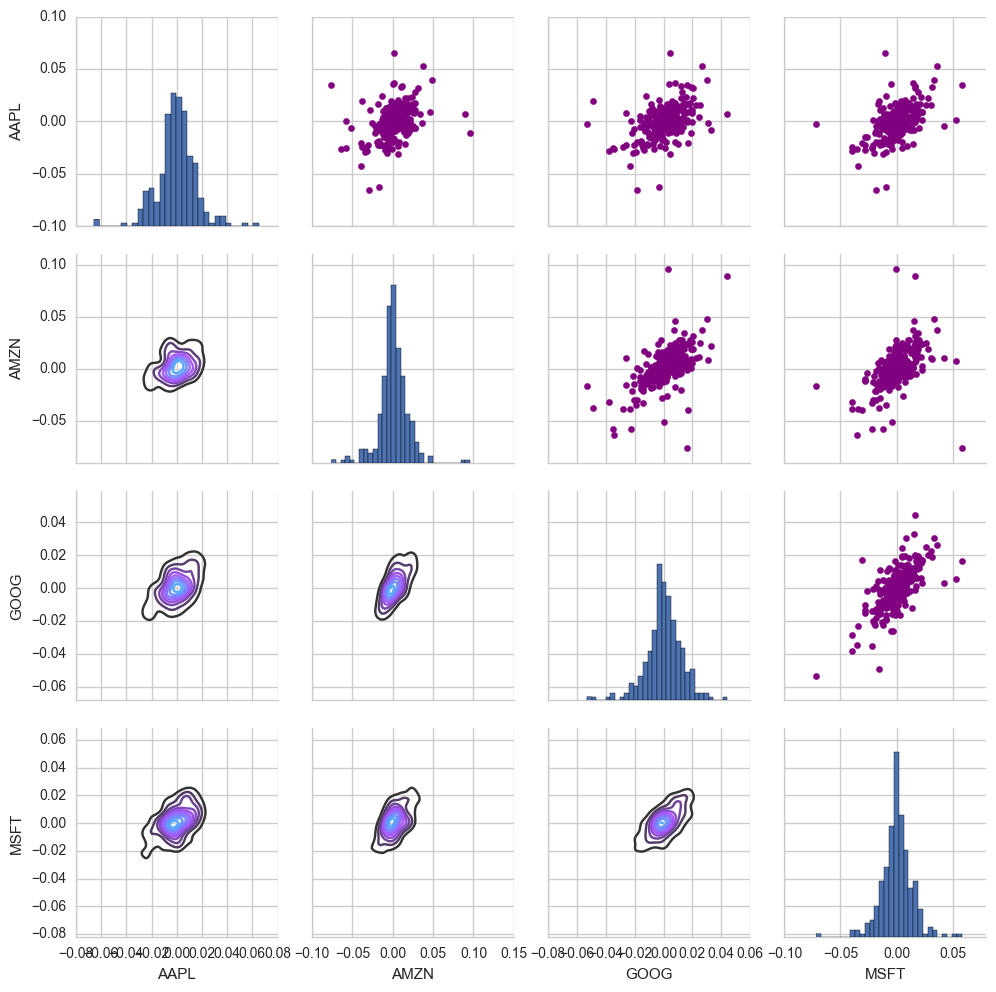

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)



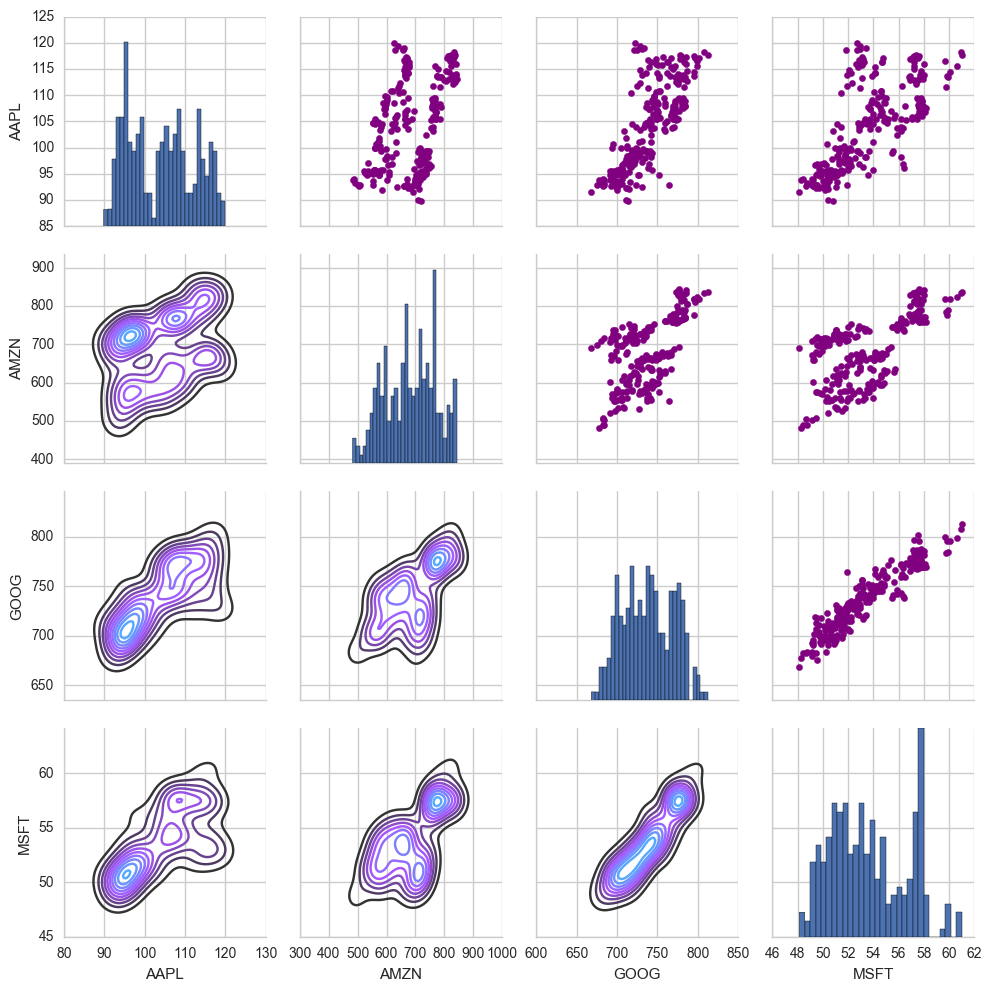

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\PrasadPagade\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\PrasadPagade\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


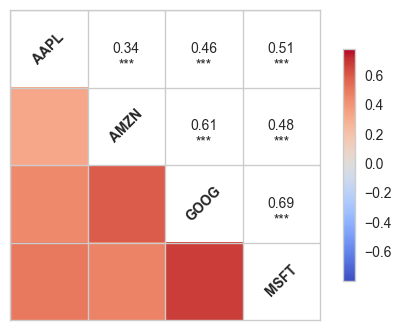

In [36]:
sns.linearmodels.corrplot(tech_rets.dropna(),annot=True)

This shows that Amazon and Google, Google and Microsoft have high correlation

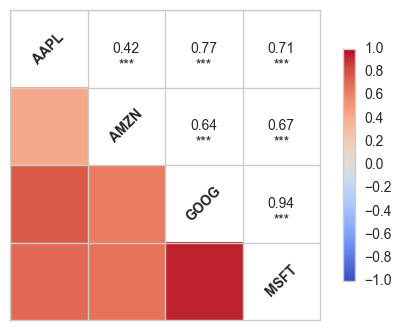

In [37]:
sns.linearmodels.corrplot(closing_df,annot=True)

Again, Google and Microsoft have greatest correlation for the closing returns.

Risk Analysis:

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [38]:
rets = tech_rets.dropna()

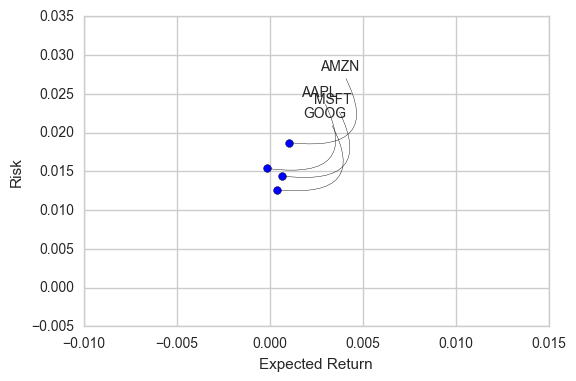

In [46]:
area = np.pi*10

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')

plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-1'))



Value at Risk:
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method:
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

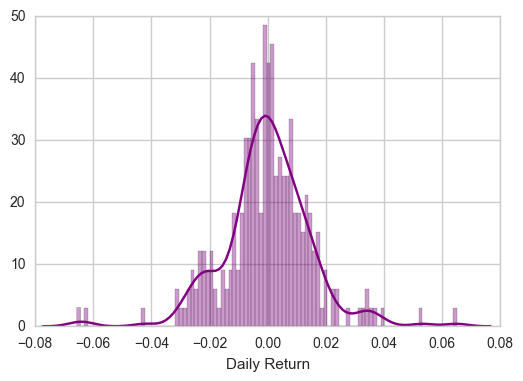

In [48]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [49]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-11-03,0.011471,-0.004838,0.001456,0.017092
2015-11-04,-0.004650,0.025012,0.008239,0.004617
2015-11-05,-0.004610,0.022935,0.004313,-0.000368
2015-11-06,0.001158,0.005674,0.003432,0.009930
2015-11-09,-0.004048,-0.005884,-0.012088,-0.013838


In [52]:
rets['AAPL'].quantile(0.05)

-0.02448509532226174

The 0.05 empirical quantile of daily returns is at -0.024. That means that with 95% confidence, our worst daily loss will not exceed 2.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0244 * 1,000,000 = $24,400.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

In [53]:
rets['GOOG'].quantile(0.05)

-0.020449376582429533

In [54]:
rets['MSFT'].quantile(0.05)

-0.021316056915810885

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√
ΔSS=μΔt+σϵΔt
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
ΔS=S(μΔt+σϵΔt)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [55]:
#set up time horizon

days = 365
dt = 1/days
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']




In [56]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x]=mu*dt
        
        price[x] = price[x-1] + price[x-1]*(drift[x] + shock[x])
        
    return price
        
    
    

In [57]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-11-02,711.059998,721.619995,705.849976,721.109985,1886300,721.109985
2015-11-03,718.859985,724.650024,714.719971,722.159973,1565400,722.159973
2015-11-04,722.000000,733.099976,721.900024,728.109985,1706700,728.109985
2015-11-05,729.469971,739.479980,729.469971,731.250000,1861600,731.250000
2015-11-06,731.500000,735.409973,727.010010,733.760010,1511600,733.760010


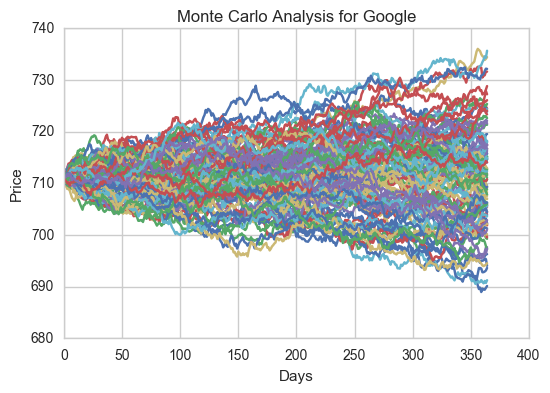

In [58]:
start_price = 711.059998

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [60]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

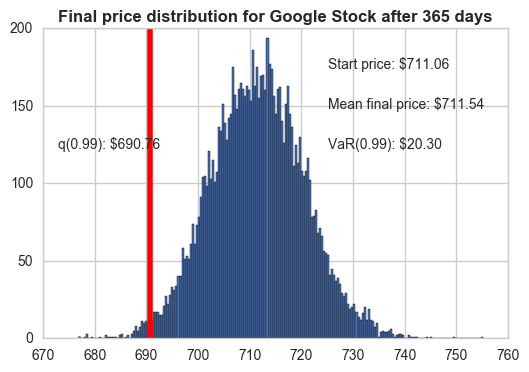

In [61]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Conclusion:
Google stock is super stable for the next 365 days. To put the histogram to words - With a confidence of 99% the worst amount of money that you could lose by investing in Google stock is $20.30 in a year.

Advice - BUY!!!!